In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, 3:5].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.cluster import OPTICS
X = np.random.rand(100, 2)
num_clusters_list = []
min_samples_range = np.arange(2, 15)
for min_samples in min_samples_range:
    optics_clusterer = OPTICS(min_samples=min_samples, max_eps=0.5)  # Adjust max_eps as needed
    optics_clusterer.fit(X)
    num_clusters = len(set(optics_clusterer.labels_)) - (1 if -1 in optics_clusterer.labels_ else 0)
    num_clusters_list.append(num_clusters)

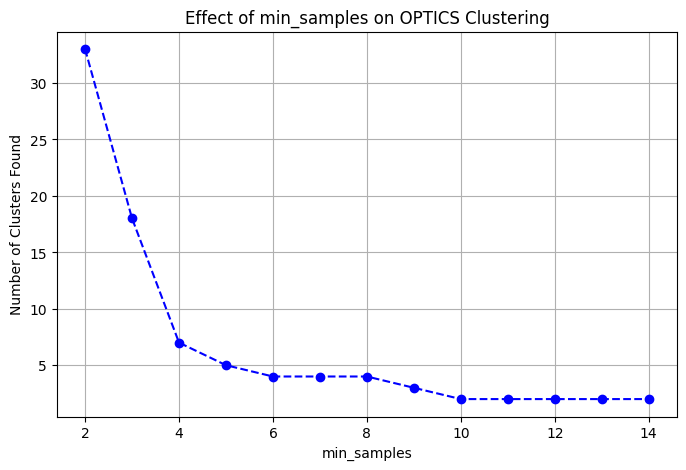

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(min_samples_range, num_clusters_list, marker='o', linestyle='--', color='b')
plt.title('Effect of min_samples on OPTICS Clustering')
plt.xlabel('min_samples')
plt.ylabel('Number of Clusters Found')
plt.grid(True)

In [8]:
num_clusters_list

[33, 18, 7, 5, 4, 4, 4, 3, 2, 2, 2, 2, 2]

In [9]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=42)
optics_clusterer = OPTICS(min_samples=5, max_eps=0.5)  # Adjust parameters as needed
y_optics = optics_clusterer.fit_predict(X)
print("Cluster labels:\n", y_optics)

Cluster labels:
 [-1 -1 -1 -1  2  3  6 -1 -1  3  4 -1 -1  4 -1  4 -1 -1 -1 -1 -1  4  0 10
  1 -1 -1  2 10 -1  4 -1 -1 -1 -1  6  0 -1  0 10  4  9  2 -1 -1  8 -1  5
 -1 -1 -1 -1 -1  8 -1 -1 -1  5  9  7  1 -1  3  0  1  5  7 -1  1 -1 -1 -1
 -1  2 -1  3  7 -1 -1  9 -1  8 -1  1 -1  1 -1  9  8 -1  5 -1 -1  8 -1 -1
  9  6  3 10 -1 -1  9  5 -1  6 -1  2  3 -1  6  3 10  1 -1 -1 -1 -1 -1  9
 -1 -1 -1  0 -1 -1 -1  8  7 -1  3  4 -1 -1 -1  6  5 -1 -1 -1 -1 -1 -1 -1
  6 -1 -1  1 -1  4 -1 -1 -1 -1  4 -1 -1  6  6  8 -1  8  6 -1 -1  3  8  7
  5  6 -1  9  2  5 -1 -1 -1  9 -1 -1  9  4  0 -1 -1 -1  6  6 -1 -1 -1  4
 -1 -1 10 -1 -1 -1  2  7]


In [10]:
supervised=dataset

In [11]:
supervised['Cluster_group']=y_optics

In [12]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,2


In [13]:
supervised.to_csv("cluster_OPTICS_Clustering.csv", index=False)

In [14]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,2


In [15]:
dir(OPTICS)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'fit',
 'fit_predict',
 'get_params',
 'set_params']

In [16]:
cluster_centers = []
for label in np.unique(y_optics):
    if label != -1:  
        cluster_points = X[y_optics == label]
        cluster_center = np.mean(cluster_points, axis=0)
        cluster_centers.append(cluster_center)

cluster_centers = np.array(cluster_centers)
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
 [[-8.72481965  6.88846296]
 [-8.39591142  7.19269438]
 [-7.21279432 -6.42754042]
 [-6.43885028 -6.51353201]
 [-7.32649407 -6.98357825]
 [-6.8379249  -7.31295476]
 [ 4.7848419   2.17242835]
 [ 4.04324963  2.19630635]
 [ 4.88481798  1.38359859]
 [-2.76474945  8.79116476]
 [-2.45303512  7.96310387]]


In [17]:
y_optics

array([-1, -1, -1, -1,  2,  3,  6, -1, -1,  3,  4, -1, -1,  4, -1,  4, -1,
       -1, -1, -1, -1,  4,  0, 10,  1, -1, -1,  2, 10, -1,  4, -1, -1, -1,
       -1,  6,  0, -1,  0, 10,  4,  9,  2, -1, -1,  8, -1,  5, -1, -1, -1,
       -1, -1,  8, -1, -1, -1,  5,  9,  7,  1, -1,  3,  0,  1,  5,  7, -1,
        1, -1, -1, -1, -1,  2, -1,  3,  7, -1, -1,  9, -1,  8, -1,  1, -1,
        1, -1,  9,  8, -1,  5, -1, -1,  8, -1, -1,  9,  6,  3, 10, -1, -1,
        9,  5, -1,  6, -1,  2,  3, -1,  6,  3, 10,  1, -1, -1, -1, -1, -1,
        9, -1, -1, -1,  0, -1, -1, -1,  8,  7, -1,  3,  4, -1, -1, -1,  6,
        5, -1, -1, -1, -1, -1, -1, -1,  6, -1, -1,  1, -1,  4, -1, -1, -1,
       -1,  4, -1, -1,  6,  6,  8, -1,  8,  6, -1, -1,  3,  8,  7,  5,  6,
       -1,  9,  2,  5, -1, -1, -1,  9, -1, -1,  9,  4,  0, -1, -1, -1,  6,
        6, -1, -1, -1,  4, -1, -1, 10, -1, -1, -1,  2,  7])

C:\Users\sathe\.conda\envs\aiml\Lib\site-packages\sklearn\cluster\_optics.py:598: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(


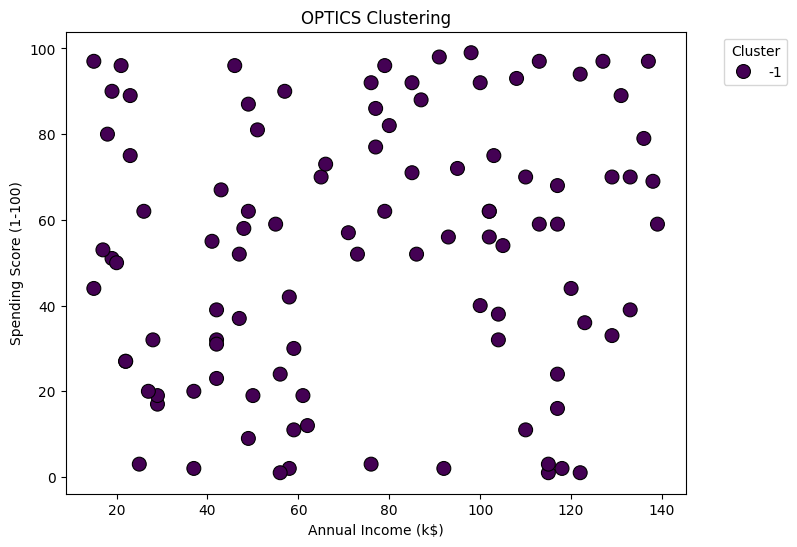

In [18]:
import seaborn as sns
np.random.seed(42)
supervised = pd.DataFrame({
    'CustomerID': np.arange(1, 101),
    'Age': np.random.randint(18, 70, 100),
    'Annual Income (k$)': np.random.randint(15, 140, 100),
    'Spending Score (1-100)': np.random.randint(1, 100, 100),
})
x_col = 'Annual Income (k$)'
y_col = 'Spending Score (1-100)'
ptics_clusterer = OPTICS(min_samples=5, max_eps=0.5)  
supervised['Cluster'] = optics_clusterer.fit_predict(supervised[[x_col, y_col]])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=supervised, x=x_col, y=y_col, hue='Cluster', palette="viridis", s=100, edgecolor='k')
plt.title('OPTICS Clustering')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend(title='Cluster', loc='best', bbox_to_anchor=(1.05, 1))
plt.show()